<br>

#### 1. 단어의 검색 결과 출력하기
- 다음 사전 (https://alldic.daum.net) 에 ‘happiness’ 단어를 검색하였을 때 출력 되는 화면에서 단어와 단어의 의미를 출력한다

In [2]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen 

In [3]:
# 검색하고 싶은 단어 입력하기
word = 'happiness'

# 불러오려는 url 입력하기 
# 디폴트 url에 string 타입의 word 변수를 합쳐서 url 변수 생성
url = 'https://alldic.daum.net/search.do?q=' + word

# urlopen 함수를 통해 web 변수를 생성. urlopen은 한글 url에서는 error
web = urlopen(url)   # urlopen(url).read().decode('utf-8')

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
web_page = BeautifulSoup(web, 'html.parser')

#### Parser 들의 장단점
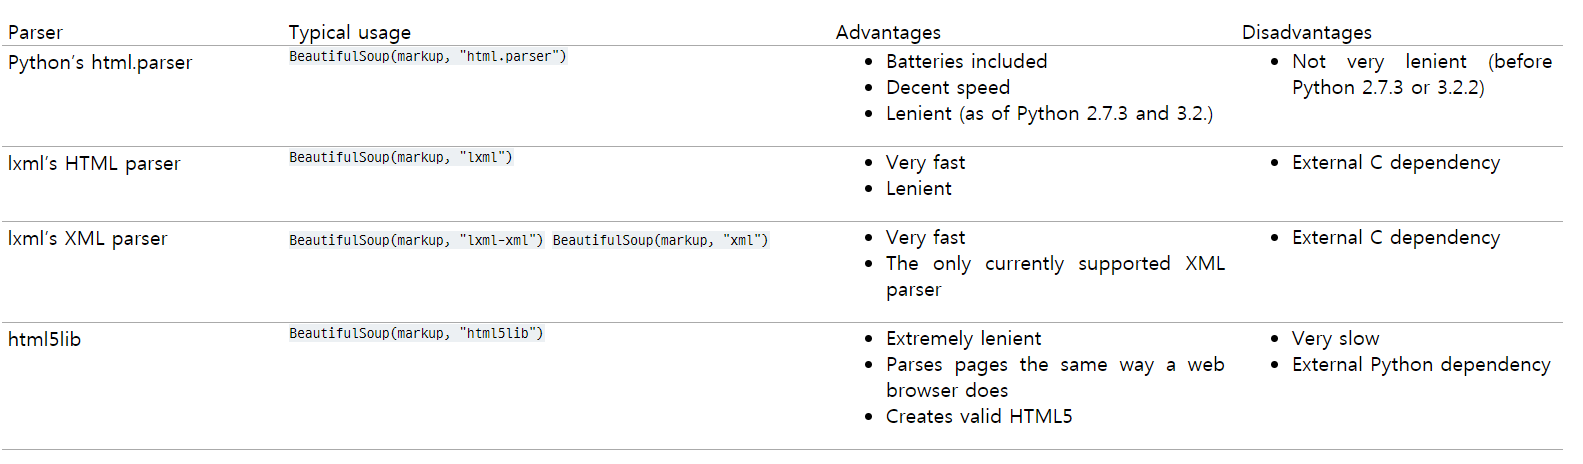

**Scraping에서 Parsing이란?**
- HTML이나 XML, JavaScript 등으로 쓰여진 소스들을 각 요소별로 나누는 것
- 이 때, 이러한 parsing을 진행해주는 것을 parser라고 부른다.

In [4]:
# 찾는 단어 (대상이 하나일 때)

box1 = web_page.find('span', {'class': 'txt_emph1'}) # 찾다
print(box1)

<span class="txt_emph1">happiness</span>


In [7]:
# 단어의 뜻 (대상이 여러개일 때)

box2 = web_page.find_all('span', {'class': 'txt_search'}) # 모두 찾다

# 링크 단어 추출
# link1 = web_page.find_all('a', {'class': 'link_menu'}) # 찾다
# for a in link1:
#     print(a)

<a class="link_menu" href="#none" id="moreDictionary">다른 사전<span class="img_comm ico_arrow"></span></a>
<a class="link_menu" href="http://wordbook.daum.net/index.do?dic_type=endic">단어장</a>
<a class="link_menu" href="/">사전홈</a>
<a class="link_menu" href="http://translate.kakao.com" target="_blank">번역<span class="img_comm img_beta">beta</span></a>


In [136]:
# 단어와 단어의 뜻 출력하기

print(box1.get_text()) # 태그를 걷어내고 내부의 텍스트만 꺼냄
print()

mean_list = web_page.find_all('ul', {'class': 'list_search'})

definitions = mean_list[0].find_all('span', {'class': 'txt_search'})

for defdef in definitions:
    print(defdef.get_text().strip()) # 앞부분의 공백을 지워주기 위해 strip() 적용

happiness

행복
만족
기쁨
행운


<br>
<br>

#### 2. 영화 정보 출력하기
- IMDb 사이트에서 영화 Guardians of the Galaxy 대한 제목(title)과 감독(director)을 출력한다

In [113]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

In [114]:
# 불러오려는 url 입력하기 (IMDb - Guardians of the Galaxy Vol. 2 (2017) )
url = 'http://www.imdb.com/title/tt3896198/?ref_=nv_sr_6'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
web_page = BeautifulSoup(web, 'html.parser')

In [115]:
# 영화 제목을 출력한다

title = web_page.find('h1')

print('Movie Title:')
print(title.get_text())

Movie Title:
Guardians of the Galaxy Vol. 2 (2017) 


In [116]:
# 영화 요약을 출력한다

summary = web_page.find('div', {'class': 'summary_text'})

print('Movie Summary:')
print(summary.get_text().strip())

Movie Summary:
The Guardians struggle to keep together as a team while dealing with their personal family issues, notably Star-Lord's encounter with his father the ambitious celestial being Ego.


In [121]:
# 감독 이름을 출력한다 (바깥의 box를 먼저 catch 후, 그 안의 tag를 catch!)

credit_sum = web_page.find('div', {'class': 'credit_summary_item'})
director = credit_sum.find_all('a')  # 결과가 array 형태로 나옴

print('Director:')
print(director[0].get_text().strip())

[<a href="/name/nm0348181/">James Gunn</a>]
Director:
James Gunn


<br>
<br>

#### 3. 영화 리뷰를 출력하고 파일에 저장 하기
- 영화 Guardians of the Galaxy Vol. 2 리뷰 내용을 출력해 보자

In [4]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [5]:
# 불러오려는 url 입력하기
url = 'http://www.imdb.com/title/tt3896198/reviews?ref_=tt_urv'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
source = BeautifulSoup(web, 'html.parser')

In [10]:
# 리뷰 데이터를 출력하고 파일로 저장한다
reviews = source.find_all('div', {'class': 'text show-more__control'})

with open('moviereview.txt','w', encoding = "utf-8") as f:
    for review in reviews:
        print(review.get_text())
        f.write(review.get_text())
        f.write("\n\n")

Despite being a huge comic book nerd I was not familiar with the Guardians before the first movie came out. I did some googling and upon learning about this sci-fi superhero team consisting of a talking raccoon and tree man I was hardly impressed.I finally got round to watching the first film and was blown away. It had a remarkable charm that even the other Marvel titles didn't have. It was filled with great humour, memorable moments and fit into the Marvel Universe long running story perfectly.Because of this I pumped by expectations up high for the sequel to a degree where it was almost guaranteed to fail yet somehow, someway it didn't.Not only did it meet my expectations but it exceeded them, GotG2 is amazing.Full of the same five star humour, being a visual treat and once again with an excellent soundtrack the film gripped me from the outset and delivered that charm all over again.This time including several industry veterans including Kurt Russell (Who has been on great form since

<br>
<br>

#### 4. 신문 기사 출력하고 저장하기
- 시애틀의 대표적인 신문 Seattle Times에서 글을 불러와 파일로 저장하기

In [11]:
# 불러오려는 url 입력하기
url = 'https://www.seattletimes.com/business/real-estate/zillows-zestimate-overvalued-a-washington-home-by-700-percent-in-a-case-of-algorithms-gone-wrong/'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
source = BeautifulSoup(web, 'html.parser')

In [21]:
title = source.find('h1').get_text()
title = title.strip()
Times_sum = source.find('p',{'class':'article-deck entry-summary p-summary'}).get_text().strip()

In [26]:
# Settle Times에 기사를 불러온다
with open('seattletimes.txt','w', encoding = 'utf-8') as f:
    
    f.write(title + '\n\n')
    f.write(Times_sum + '\n\n\n')
    
    times = source.find('div',{'id': 'article-content'})
    article = times.find_all('p')
    
    for content in article:
        print(content.get_text())
        f.write(content.get_text() + '\n')

When Seattle residents Sue and Roy Carlson bought a modest home on the Kitsap Peninsula in June, they paid $225,000 — a discount because the house was headed for foreclosure.
Redfin now estimates the home in Belfair, southwest of Bremerton, is worth $318,000. Realtor.com’s algorithm pegs the house at $268,000. And the county assessor has valued it at $283,000.
But like most homes, when you Google its address, the first thing that shows up is its Zillow page.
And according to that Zillow page, the home is now worth $1.8 million.
There’s no waterfront access, redevelopment potential or anything else significant about the property — in fact, it needs serious work. So how could an unremarkable three-bedroom home, located in a city where Zillow says the median home costs $286,000, be worth that much?
“I don’t have a clue where they came up with this number,” said Sue Carlson, 70. “It’s not worth anywhere near $1 million. They’re nuts.”
Carlson went on a mission to figure out how her home co

<br>
<br>

#### (Extra) Brunch 기사글 출력하고 저장하기
- 브런치 주간지에 실린 기사을 불러와 파일로 저장하기

In [37]:
# Save multiple articles automatically

# @imagineer 님의 글 10개를 자동으로 가져와 저장하는 코드를 작성해보세요!
# str에는 str만 더할 수 있어요!
# except를 활용해 HTTp 404 error 발생 시 (해당 URL의 page 존재 x) 예외처리

import time

error_urls = []
for i in range(10):
    try:
        url = 'https://brunch.co.kr/@imagineer/' + str(i) # 불러오려는 url 입력하기
        web = urlopen(url)                         # urlopen 함수를 통해 web 변수를 생성
        source = BeautifulSoup(web, 'html.parser') # 페이지상의 HTML 구조를 파싱

        with open('brunch_all.txt', 'a', encoding = 'utf-8') as f:

            all_text = source.find('div',{'class':'wrap_body'})
            article = all_text.find_all('p')

            for content in article:
                print(content.get_text())
                f.write(content.get_text() + '\n')
    except:
        url = 'https://brunch.co.kr/@imagineer/' + str(i)
        print('*** URL {} 게시글에서 에러가 발생했습니다. ***'.format(url))
        error_urls.append(url)
        
    time.sleep(3)

*** URL https://brunch.co.kr/@imagineer/0 게시글에서 에러가 발생했습니다. ***
결혼한 지 1년이 지났다. 지금도 너무 행복하지만 우리는 더 가슴 뛰는 삶을 살고 싶었고, 그러기 위해 더 치열하게 행복을 찾아다녔다. 우리 부부는 연말이 다가오면서 더 많은 이야기를 나눴다. 

그래서 2016년에는 한국을 떠나 1~2년 정도 외국에서 생활을 해보기로 마음 먹었다. 그렇게 시작된 살아보고 싶은 나라 목록 만들기에 이미 며칠의 시간이 걸렸다. 호주, 미국, 독일, 네덜란드, 영국, 스페인 등 여러 나라가 우선 후보에 올랐다. 서로 살아보고 싶은 나라를 이야기하고 거기서 일을 쉽게 구할 수 있을지도 알아봤다. 워킹홀리데이도 쉽게 비자를 얻을 수 있다는 점에서 찾아보던 중에 내년부터 칠레에 워킹홀리데이를 떠날 수 있다는 사실을 알게 되었다. 스페인에서 9개월, 브라질에서 3개월을 살아봤던 나에게는 남미에서 사는 결정은 크게 어렵지 않은 것이었겠지만, 부인도 호기심에 가득찬 표정으로 너무나 흔쾌히 가고 싶다고 말했다. 그 이후로는 일사천리. '어떻게하면 칠레에서도 재택이 가능한 일을 구해서, 안정적으로 칠레의 산티아고에 정착할 수 있을까?'라는 고민을 즐겁게 껴안은 채, 하나하나 준비해보기로 했다.

내년 말에 떠나게 되는 나라는 칠레가 아닐 수도 있다. 하지만 내가 사랑하는 사람과 새로운 환경에 처한다는 것은 언제나 즐거운 일이고 항상 나를 발전하게 하리라는 사실을 명백하다. 내일이 아니라, 바로 오늘 도전하면서 살고 싶다.
<인문학도, 개발자되다>의 목차이자 첫 글
1. 더 똑똑하게 일하고 싶다
2. 나는 전세계를 마주할 수 있는 비지니스를 하고 싶다
3. 대한민국 정부님께서 도와주셨다
4. 개발자로 일하기 시작하다
5. 직업으로의 개발자 깊게 이해하기
6. 좋은 스타트업 찾는 법
7. 남쪽에서 귀인을 만나다
8. 어떻게 개발을 공부해야 할까?
9. 오, 캡틴! 나의 캡틴!

같은 매거진 내 다른 글 <출퇴근 없는 삶>의 목차이자 첫

아래 링크는 <외국어 덕후의 학습법> 첫 글이자 목차
하나, 뭐? 외국어 하나 정복 하는데, 6개월이면 충분하다고? | 영어 때문에 힘든 시절이 있었다. 고등학교를 마치고 서울에 올라 왔는데, 대학 동기들이 영어를 다들 너무 잘하더라. 다들 영미권 어느 나라에서 몇 년 살다왔노라 이야기를 들으면서
brunch.co.kr/@imagineer/5




외국어는 시간 투입이 많이 드는 취미다. 그리고 손을 놓으면 언제 공부했었냐는 듯이 하나도 기억이 안나는 놀라운 분야다. 외국어를 도전하는 많은 사람들이 주위에서 다들 하니까 시작하는 경우가 많다. '나도 외국어 하나쯤 해봐야 할 것 같은데'라는 접근은 십중팔구 포기로 이어진다. 실패도 의미가 있겠지만, 기왕이면 해내면 더 좋지 않을까? 뭐든지 좋으니 내가 그 외국어를 공부하는 이야가 있어야 한다. 거창할 필요도 없고, 그 언어로 책을 읽어보고 싶다든지, 그 나라 이성이 매력적이라든지, 그 나라에 한 번 살아보고 싶든지, 추상적이지 않은 이유가 있었으면 좋겠다.

나에게 외국어는 소통이다. 새로운 외국어를 하나 배우는 것은 새로운 세계의 문이 하나 열리는 것 같은 기분을 가져온다. 실제로 새로운 외국어를 통해 많은 친구를 사귀었고, 여러 나라를 여행했다. 한국과는 다른 세상을 접하며 내가 당연하다고 생각한 많은 것이 송두리째 무너지는 것을 느꼈다. 그리고 그 위에 새롭게 나를 만들어갔다. 그리고 앞으로 배우는 외국어 역시 나를 크게 성장 시켜 주리라 믿어 의심치 않는다.


내가 배우고 싶은 외국어를 정하는 데 나만의 원칙이 있다.

1. 가능한 많은 사람이 쓰는 언어
2. 영어로 생활이 가능하지 않은 나라의 언어
3. 전세계를 누비는데 도움이 될 수 있는 언어

그리고 이렇게 배운 외국어로 해보고 싶은 건,

- 나는 내가 구사하는 외국어로 책을 최소한 한 권씩 써보고 싶다.
- 한 나라의 소식을 한국의 언론의 시선으로 재가공한 형태가 아닌 그 사람들의 목소리로 들어보고 싶다.
- 문학 고전을 원서로 읽어 보고 

In [38]:
error_urls

['https://brunch.co.kr/@imagineer/0',
 'https://brunch.co.kr/@imagineer/8',
 'https://brunch.co.kr/@imagineer/9']